In [1]:
from igraph import Graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib import rc
# Used to transform vertex data from 'graph' into a matrix
def get_matrix():
    # Get vertex information
    # Calculate the inverse of edge weights and store them in the 'w_inv' property
    graph.es['w_inv'] = 1.0 / np.array(graph.es['weight'])
    vertex_info = []
    geocodes = graph.vs["geocode"]
    degrees = graph.degree()
    betweenness = graph.betweenness(vertices=None, directed=False, cutoff=None, weights='w_inv')
    clustering = graph.transitivity_local_undirected()
    strength = graph.strength(weights="weight")
    closeness_w = graph.closeness(vertices=None, mode='all', cutoff=None, weights='w_inv', normalized=True)
    eignv_w = graph.evcent(directed=False, scale=True, weights='w_inv', return_eigenvalue=False)
    #prank_w = nx.pagerank(g_nx, alpha=0.85, weight='weight')
    #vuln_w = vn.vulnerability(graph, weights='w_inv')
    geocodes_int = list(map(int, geocodes))
    geocodes_strings = list(map(str,geocodes_int))
    # Construct the vertex information matrix
    vertex_info = list(zip(geocodes_strings, degrees, betweenness, clustering, strength, closeness_w, eignv_w))

    return vertex_info

# Filter cases from a CSV file based on a minimum number of cases
# and return a list of filtered elements and their data
def filter_cases(csv_file, n):
    # Read the CSV file and define the columns to be considered
    df = pd.read_csv(
        csv_file,
        encoding='utf-8',
        sep=',',
        usecols=['ibgeID', 'newCases', 'totalCases', 'date'],
        dtype={'ibgeID': int}  # Define the appropriate data type for ibgeID if possible
    )
    # Filter records that meet the requirements
    filtered_df = df[(df['totalCases'] >= n) & (df['newCases'] >= 1) & (df['ibgeID'] != 0) & (df['ibgeID'] > 1000)]
    # Remove duplicate records based on ibgeID
    filtered_df = filtered_df.drop_duplicates(subset='ibgeID')
    # Return the results as a list of tuples
    filtered_cases = list(zip(filtered_df['date'], filtered_df['ibgeID'].apply(repr)))
    return filtered_cases

def setUp_comparsion_table(cases):
# Set up the comparison matrix
    comparison_matrix = np.array([Id_matrix_covid, degrees_similarity, betweenness_similarity, clustering_similarity,
                              strength_similarity, closeness_w_similarity, eignv_w_similarity])
    Table_Names = ["DATES", "degrees", "betweenness", "clustering", "strength", "closeness_w", "eignv_w"]
    Final_Table = pd.DataFrame(comparison_matrix.T, columns=Table_Names)
# Save the final table to an Excel file
    excel_name = f"Datas/results/results_tables/result_table-{cases}cases.xlsx"
    Final_Table.to_excel(excel_name, index=False)
    
# Filter records from list A based on a filtered list of cities with more than N Covid cases
def filter_records(list_A, list_B): 
    # Create sets of geocodes for easy verification
    geocode_set_A = set(record[0] for record in list_A)
    geocode_set_B = set(record[1] for record in list_B)
    # Find geocodes that exist in both sets
    common_geocodes = geocode_set_A.intersection(geocode_set_B)
    # Filter records that meet the criteria
    filtered_list = [record for record in list_A if record[0] in common_geocodes]
    return filtered_list

def filter_records2(list_A, list_B):
    # Create a set of all geocodes in list A for easy verification
    geocode_set_A = set(record[0] for record in list_A)
    # Filter records in list B that meet the criteria
    filtered_list = [record for record in list_B if record[1] in geocode_set_A]    
    return filtered_list
# Verify the similarity between an ordered list of cities based on a certain metric
# and the list of cities with B Covid cases over time
#SE EU ORDENAR VAI DAR O MESMO QUE O CASO NORMAL 
def compare_random(metrics_matrix):
    # Select the columns from the matrices
    result = []
    for i in range(1, matrix_size + 1):
        col1_elements = set(Id_matrix_covid[:i])
        col2_elements = set(metrics_matrix[:i].astype(float))
        intersection = col1_elements.intersection(col2_elements)
        similarity_percentage = (len(intersection) / len(col1_elements))
        result.append(similarity_percentage)
    return result

def compare_columns(metrics_matrix, col_idx):
    # Select the columns from the matrices
    result = []
    aux = metrics_matrix[metrics_matrix[:, col_idx].argsort()[::-1]]
   
    for i in range(1, matrix_size + 1):
        col1_elements = set(Id_matrix_covid[:i])

        col2_elements = set(aux[:i, 0].astype(float))
        intersection = col1_elements.intersection(col2_elements)
        similarity_percentage = (len(intersection) / len(col1_elements))
      
        result.append(similarity_percentage)
    return result

def calculate_random_metric_averages(data_matrix):
    
    Mselected_data = data_matrix.copy()
    # Extraia a segunda coluna (coluna 'geocode')
    # Embaralhe a lista de geocodes
    for _ in range(10):
        np.random.shuffle(Mselected_data)
    # Atualize a segunda coluna com os geocodes embaralhados
    similarity = compare_random(Mselected_data)
    result_data = {
        "Similarity": similarity}
    result_date_df = pd.DataFrame(result_data)
    result_date_df['id'] = range(1, len(result_date_df) + 1)
    excel_name = "random_metric_averages.xlsx"
    result_date_df.to_excel(excel_name, index=False)
    return result_date_df




In [3]:
graph = Graph.Read_GraphML("Datas/networks/grafo_Peso_Geral.GraphML")
covidID_list = filter_cases("Datas/Pre-processed/cases-brazil-cities-time_2020.csv", 1)
metrics_list = filter_records(get_matrix(), covidID_list)
covidID_list = filter_records2(metrics_list,covidID_list)
metrics_matrix = np.array(metrics_list)
covid_matrix = np.array(covidID_list)
Id_matrix_covid = covid_matrix[:, 1].astype(float)
print(covid_matrix)

C:\Users\romul\AppData\Local\Temp\ipykernel_19416\4277059575.py:1: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:492
  graph = Graph.Read_GraphML("Datas/networks/grafo_Peso_Geral.GraphML")


[['2020-02-25' '3550308']
 ['2020-03-05' '3300407']
 ['2020-03-06' '2910800']
 ...
 ['2020-10-27' '3108503']
 ['2020-11-06' '3165206']
 ['2020-11-13' '3149408']]


In [23]:
#print(len(metrics_matrix[1]))
#print(len(Id_matrix_covid))

metrics_df = pd.DataFrame(metrics_matrix,columns=[
    "geocode",
    "degree",
    "clustering",
    "Weighted_strength",
    "Weighted_betweenness",
    "Weighted_closeness",
    "Weighted_eignv",
])



              Métrica   Kendall  Spearman
0              degree -0.071978 -0.106331
1  Weighted_closeness -0.044783 -0.067573


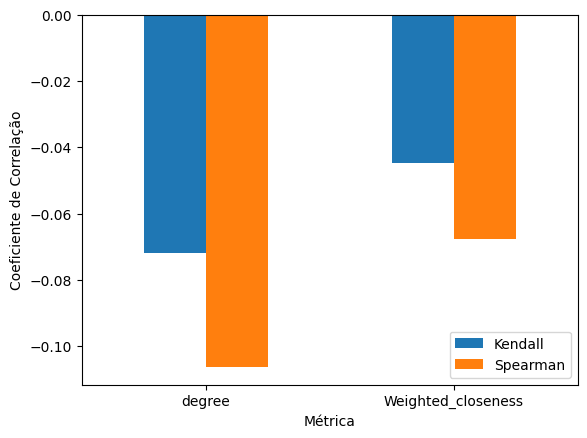

In [24]:
from scipy.stats import kendalltau, spearmanr

metrics_df["CV19-ORD"] = Id_matrix_covid
geo_indexados = {geocode: idx + 1 for idx, geocode in enumerate(metrics_df['geocode'])}
# Substitui os nomes dos lutadores por seus índices em 'CV19-ORD'
metrics_df['CV19-ORD'] = [geo_indexados[geocode] for geocode in Id_matrix_covid]

# Calcula os coeficientes de Kendall e Spearman para cada métrica
kendall_corr_degree, _ = kendalltau(metrics_df['degree'], metrics_df['CV19-ORD'])
spearman_corr_degree, _ = spearmanr(metrics_df['degree'], metrics_df['CV19-ORD'])

kendall_corr_Weighted_closeness, _ = kendalltau(metrics_df['Weighted_closeness'], metrics_df['CV19-ORD'])
spearman_corr_Weighted_closeness, _ = spearmanr(metrics_df['Weighted_closeness'], metrics_df['CV19-ORD'])

# Cria um DataFrame para os resultados
resultados = pd.DataFrame({
    'Métrica': ['degree', 'Weighted_closeness'],
    'Kendall': [kendall_corr_degree, kendall_corr_Weighted_closeness],
    'Spearman': [spearman_corr_degree, spearman_corr_Weighted_closeness],
})
print(resultados)
# Plota um gráfico de barras
resultados.plot(x='Métrica', y=['Kendall', 'Spearman'], kind='bar', rot=0)
plt.ylabel('Coeficiente de Correlação')
plt.show()